# MultLinearRegression

In [1]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
from statsmodels.tools import add_constant
from statsmodels.regression.linear_model import RegressionResults
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
%matplotlib inline
sns.set_style("ticks")
pd.set_option('display.width', 1500)
pd.set_option('display.max_column',100)
sns.set_context('notebook')

### Residual Analysis

In [3]:
nyc_cab_df = pd.read_csv(r'C:\Users\ashwi\Desktop\CS109\nyc_car_hire_data.csv',low_memory = False)

In [4]:
nyc_cab_df.head()

,AWND,Base,Day,Dropoff_latitude,Dropoff_longitude,Ehail_fee,Extra,Fare_amount,Lpep_dropoff_datetime,MTA_tax,PRCP,Passenger_count,Payment_type,Pickup_latitude,Pickup_longitude,RateCodeID,SNOW,SNWD,Store_and_fwd_flag,TMAX,TMIN,Tip_amount,Tolls_amount,Total_amount,Trip_distance,Trip_type,Type,VendorID,lpep_pickup_datetime,Trip Length (min)
0,4.7,B02512,1,NaN,NaN,NaN,NaN,33.863498,2014-04-01 00:24:00,NaN,0.0,NaN,NaN,40.7690,-73.9549,NaN,0.0,0.0,NaN,60,39,NaN,NaN,NaN,4.083561,NaN,1,NaN,2014-04-01 00:11:00,13.0
1,4.7,B02512,1,NaN,NaN,NaN,NaN,19.022892,2014-04-01 00:29:00,NaN,0.0,NaN,NaN,40.7267,-74.0345,NaN,0.0,0.0,NaN,60,39,NaN,NaN,NaN,3.605694,NaN,1,NaN,2014-04-01 00:17:00,12.0
2,4.7,B02512,1,NaN,NaN,NaN,NaN,25.498981,2014-04-01 00:34:00,NaN,0.0,NaN,NaN,40.7316,-73.9873,NaN,0.0,0.0,NaN,60,39,NaN,NaN,NaN,4.221763,NaN,1,NaN,2014-04-01 00:21:00,13.0
3,4.7,B02512,1,NaN,NaN,NaN,NaN,28.024628,2014-04-01 00:39:00,NaN,0.0,NaN,NaN,40.7588,-73.9776,NaN,0.0,0.0,NaN,60,39,NaN,NaN,NaN,2.955510,NaN,1,NaN,2014-04-01 00:28:00,11.0
4,4.7,B02512,1,NaN,NaN,NaN,NaN,12.083589,2014-04-01 00:40:00,NaN,0.0,NaN,NaN,40.7594,-73.9722,NaN,0.0,0.0,NaN,60,39,NaN,NaN,NaN,1.922292,NaN,1,NaN,2014-04-01 00:33:00,7.0


In [5]:
nyc_cab_sample = nyc_cab_df.sample(n=1000,random_state=2)

y = nyc_cab_sample['Fare_amount'].values
X = nyc_cab_sample[['Trip Length (min)']].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 0)
regression = LinearRegression(fit_intercept=True)
regression.fit(X_train,y_train)

regression_line = lambda x:regression.intercept_ + regression.coef_[0]*x
print('The Euqation of the regression line is : {} + {} * x'.format(regression.intercept_,regression.coef_[0]))

The Euqation of the regression line is : 6.470468317419144 + 0.7164786391058208 * x


In [6]:
train_R_sq = regression.score(X_train,y_train)
test_R_sq = regression.score(X_test,y_test)
print("The Train R^2 is : {} and the Test R^2 is : {}".format(train_R_sq,test_R_sq))

The Train R^2 is : 0.43757715681817544 and the Test R^2 is : 0.37689502630798666


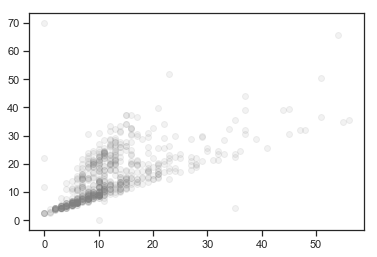

In [7]:
plt.scatter(X_train,y_train,color = 'gray',alpha = 0.1,label = 'Data points')

Text(0.5,1,'NYC Care Hire Data:\n Residual Histogram')

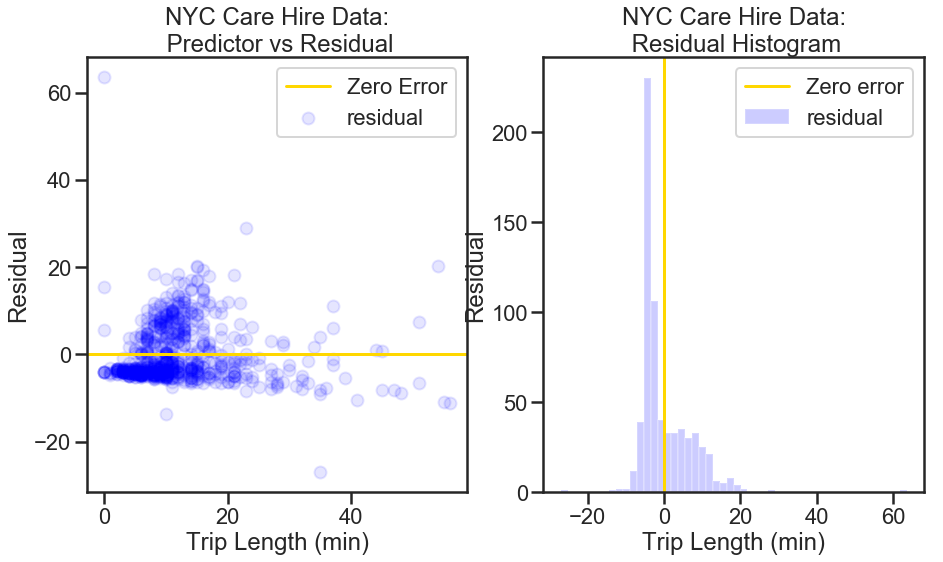

In [8]:
error = y_train - regression.predict(X_train)
sns.set_context('poster')
fig, ax = plt.subplots(1,2,figsize = (15,8))

ax[0].scatter(X_train,error,color = 'blue',alpha = 0.1,label = 'residual')
ax[0].axhline(y = 0,color = 'gold',label = 'Zero Error')
ax[0].set_xlabel('Trip Length (min)')
ax[0].set_ylabel('Residual')
ax[0].set_title('NYC Care Hire Data:\n Predictor vs Residual')
ax[0].legend(loc='best')

ax[1].hist(error,color = 'blue',alpha = 0.2,label = 'residual',bins=50)
ax[1].axvline(x = 0,color = 'gold',label = 'Zero error')
ax[1].legend(loc = 'best')
ax[1].set_xlabel('Trip Length (min)')
ax[1].set_ylabel('Residual')
ax[1].set_title('NYC Care Hire Data:\n Residual Histogram')

In [23]:
nyc_cab_sample = nyc_cab_df.sample(n=1000,random_state=2)
nyc_cab_sample['lpep_pickup_datetime'] = nyc_cab_sample['lpep_pickup_datetime'].apply(lambda x:pd.to_datetime(x).hour)
nyc_cab_sample['Lpep_dropoff_datetime'] = nyc_cab_sample['Lpep_dropoff_datetime'].apply(lambda x:pd.to_datetime(x).hour)
msk = np.random.rand(len(nyc_cab_sample)) < 0.8
train = nyc_cab_sample[msk]
test = nyc_cab_sample[~msk]

y_train = train['Fare_amount'].values
X_train = train[['Trip Length (min)', 'Type', 'TMAX']].values

y_test = test['Fare_amount'].values
X_test = test[['Trip Length (min)', 'Type', 'TMAX']].values

In [25]:
multi_regression_model = LinearRegression(fit_intercept=True)
multi_regression_model.fit(X_train,y_train)

print('The Question of the regression plane is : {} + {}^T * x'.format(multi_regression_model.intercept_,multi_regression_model.coef_))

The Question of the regression plane is : 1.867699791006828 + [0.78090298 9.88773022 0.01179983]^T * x


In [27]:
import sklearn.metrics as skm
train_mse = skm.mean_squared_error(y_train,multi_regression_model.predict(X_train))
test_mse = skm.mean_squared_error(y_test,multi_regression_model.predict(X_test))
print('The Train MSE is {} and the Test MSE is {}'.format(train_mse,test_mse))

train_r_sq = multi_regression_model.score(X_train,y_train)
test_r_sq = multi_regression_model.score(X_test,y_test)
print('The Train R sq. is {} and the Test R sq. is {}'.format(train_r_sq,test_r_sq))

The Train MSE is 22.55891591561486 and the Test MSE is 15.726508910967203
The Train R sq. is 0.7014316775595801 and the Test R sq. is 0.7630229725844782


In [28]:
def find_regression_params(regression_model, samples, cols):
    nyc_cab_sample = nyc_cab_df.sample(n=samples)

    y = nyc_cab_sample['Fare_amount'].values
    X = nyc_cab_sample[cols].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    regression_model.fit(X_train, y_train)
    
    return np.hstack((np.array([regression_model.intercept_]), regression_model.coef_))

### PLOTTING ROUTINE FOR HIST 
def plot_hist_se(vals, bins, title, xlabel, ax):
    mean = vals.mean()
    std = vals.std()
    ax.hist(vals, bins=bins, color='blue', edgecolor='white', linewidth=1, alpha=0.2)
    ax.axvline(mean, color='red', label='mean = {0:.2f}'.format(mean))
    ax.axvline(mean - 2 * std, color='green', linestyle='--', label='std = {0:.2f}'.format(std))
    ax.axvline(mean + 2 * std, color='green', linestyle='--')

    ax.set_xlabel(xlabel)
    ax.set_ylabel('Frequency')
    ax.set_title(title)
    ax.legend(loc='best')


    return ax

In [33]:
total_draws = 500
samples = 1000
regression_parms = []

for i in range(total_draws):
    if i%10 == 0:
        out = i * 1. / total_draws * 100
        sys.stdout.write("\r%d%%" %out)
        sys.stdout.flush()
        
    regression_parms.append(find_regression_params(multi_regression_model,samples,['Trip Length (min)', 'Type', 'TMAX']))
    
sys.stdout.write("\r%d%%" %100);

98%

In [41]:
regression_parms = np.array(regression_parms)

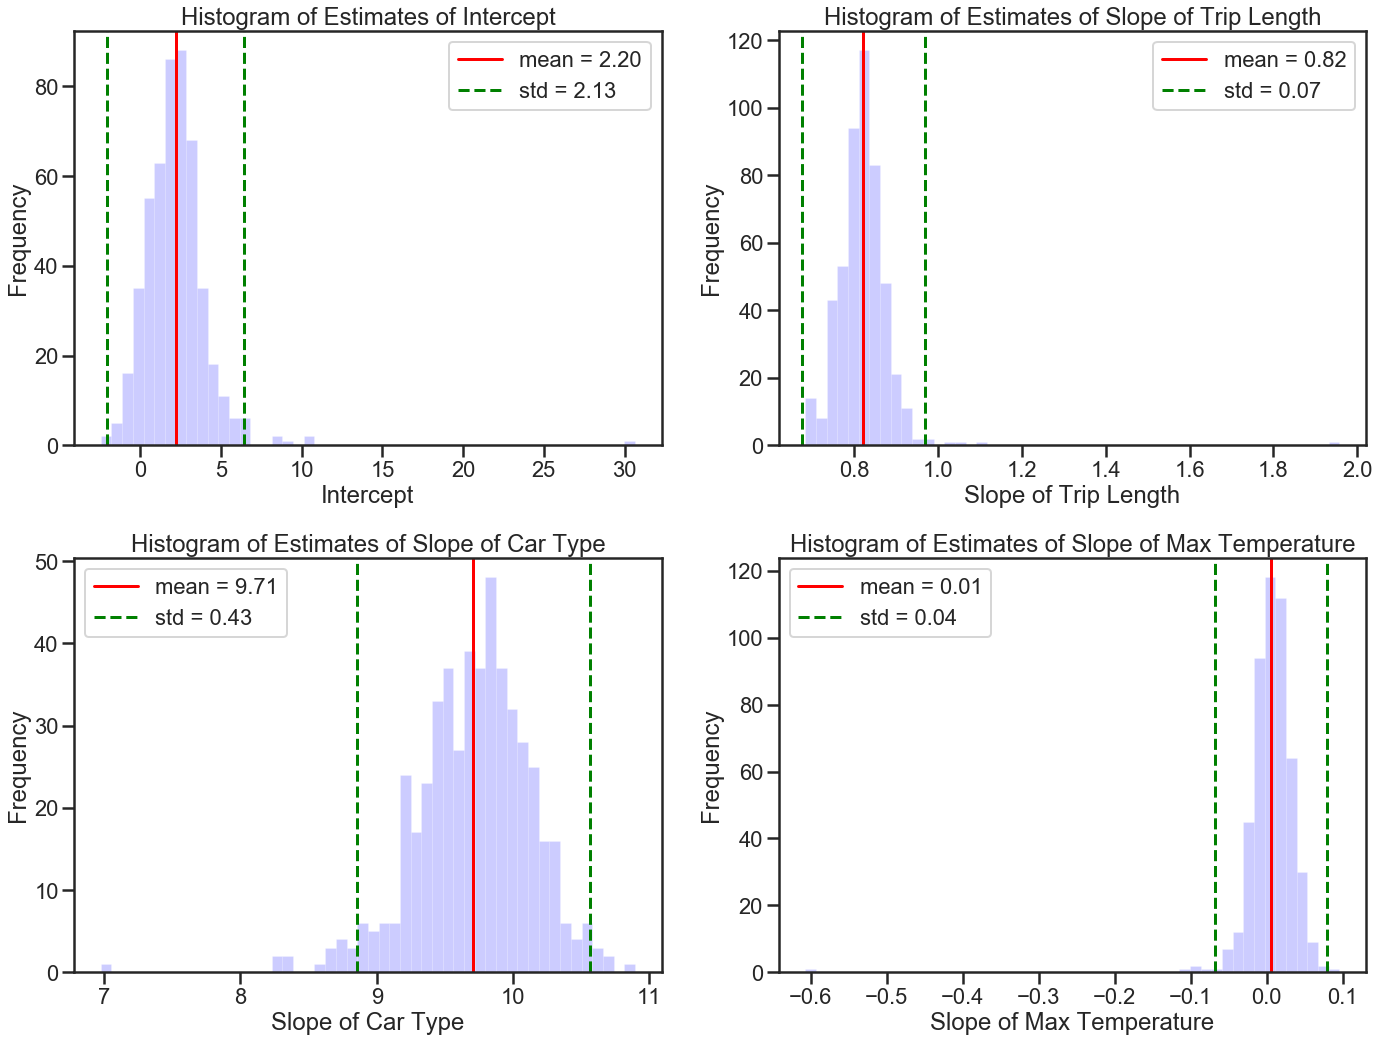

In [42]:
fig , ax = plt.subplots(2,2,figsize = (20,15))

plot_hist_se(regression_parms[:, 0], 50, 'Histogram of Estimates of Intercept', 'Intercept', ax[0,0])
plot_hist_se(regression_parms[:, 1], 50, 'Histogram of Estimates of Slope of Trip Length', 'Slope of Trip Length', ax[0,1])
plot_hist_se(regression_parms[:, 2], 50, 'Histogram of Estimates of Slope of Car Type', 'Slope of Car Type', ax[1,0])
plot_hist_se(regression_parms[:, 3], 50, 'Histogram of Estimates of Slope of Max Temperature', 'Slope of Max Temperature', ax[1,1])

plt.tight_layout()
plt.show()

### Evaluating the Significance of Predictors

In [56]:
predictors_multiple = ['Trip Length (min)', 'Type', 'TMAX']
predictors_simple = ['Trip Length (min)']

X_train_multi = add_constant(train[predictors_multiple].values)
X_test_multi = add_constant(test[predictors_multiple].values)

X_train_simple = add_constant(train[predictors_simple].values)
X_test_simple = add_constant(test[predictors_simple].values)



### 1. Measuring Significance Using F-Stat, p-Values

In [60]:
multi_regression_model = sm.OLS(y_train, X_train_multi).fit()
print('F-Stats : ',multi_regression_model.fvalue)
print('P-Value : {} intercept,{} Trip lendth,{} Type,{} TMAX'.format(*multi_regression_model.pvalues))

F-Stats :  624.9183594086105
P-Value : 0.13654858960337019 intercept,1.0025370789266225e-172 Trip lendth,1.5841079799717702e-117 Type,0.5528086692050715 TMAX


###  Measuring Significance Using AIC/BIC

In [62]:
print("AIC for ['Trip Length (min)', 'Type', 'TMAX']:", multi_regression_model.aic)
print("BIC for ['Trip Length (min)', 'Type', 'TMAX']:", multi_regression_model.bic)

AIC for ['Trip Length (min)', 'Type', 'TMAX']: 4783.113965675987
BIC for ['Trip Length (min)', 'Type', 'TMAX']: 4801.862400107453


In [63]:
simple_regression_model = sm.OLS(y_train, X_train_simple).fit()
print("AIC for ['Trip Length (min)']:", simple_regression_model.aic)
print("BIC for ['Trip Length (min)']:", simple_regression_model.bic)

AIC for ['Trip Length (min)']: 5313.251114648418
BIC for ['Trip Length (min)']: 5322.62533186415


### Measuring Significance Using R^2


In [74]:
simple_model = LinearRegression(fit_intercept=False)
simple_model.fit(X_train_simple, y_train)

print("Simple Model: train R^2 = {}, test R^2 = {}".format(simple_model.score(X_train_simple, y_train), simple_model.score(X_test_simple, y_test)))

multiple_model = LinearRegression(fit_intercept=False)
multiple_model.fit(X_train_multi, y_train)

print("Multiple Predictor Model: train R^2 = {}, test R^2 = {}".format(multiple_model.score(X_train_multi, y_train), multiple_model.score(X_test_multi, y_test)))

Simple Model: train R^2 = 0.4188521423385552, test R^2 = 0.4357149245208759
Multiple Predictor Model: train R^2 = 0.7014316775595799, test R^2 = 0.7630229725844796


In [68]:
multi_regression_model = LinearRegression(fit_intercept=True)

cols = ['Trip Length (min)', 'Type', 'Trip_distance', 'TMAX', 'TMIN', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime', 'Pickup_longitude', 'Pickup_latitude', 'SNOW', 'SNWD', 'SNWD', 'PRCP']
train_R_sq = []
test_R_sq = []
for i in range(1,len(cols)+1):
    predictors = cols[:i]
    X_train = train[predictors].values
    X_test = test[predictors].values
    
    multi_regression_model.fit(X_train,y_train)
    
    train_R_sq.append(multi_regression_model.score(X_train,y_train))
    test_R_sq.append(multi_regression_model.score(X_test,y_test))

Text(0.5,1,'Number of predictors vs $R^2$')

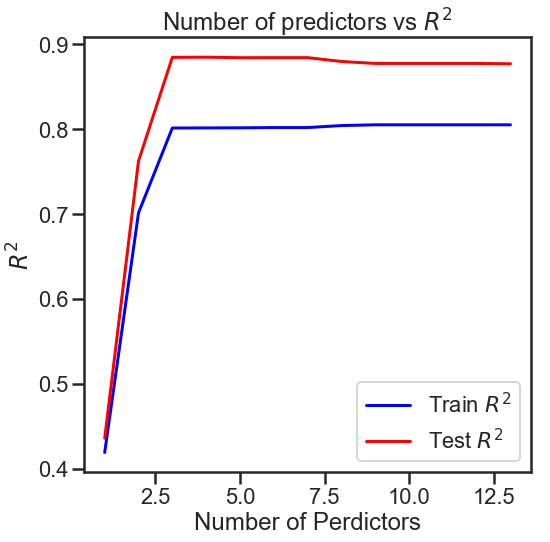

In [77]:
plt.figure(figsize=(8,8))
plt.plot(range(1,len(cols)+1),train_R_sq,color = 'blue',label = 'Train $R^2$')
plt.plot(range(1,len(cols)+1),test_R_sq,color = 'red',label = 'Test $R^2$')
plt.legend(loc = 'best')
plt.xlabel('Number of Perdictors')
plt.ylabel('$R^2$')
plt.title('Number of predictors vs $R^2$')